# Lung Pneumonia Detection

In [14]:
import os
os.listdir('../../../../chest_xray')

['chest_xray', 'test', 'train', 'val', '__MACOSX']

## Importing libraries

In [9]:
from keras.layers import Input, Lambda, Dense, Flatten 
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

## Re-sizing all the images

In [15]:
IMAGE_SIZE = [224, 224]

train_path = '../../../../chest_xray/train'
test_path = '../../../../chest_xray/test'

## Using VGG16 to create the model

In [16]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top = False)

58892288/58889256 [==============================] - 107s 2us/step


### Don't train existing weights

In [17]:
for layer in vgg.layers:
    layer.trainable = False

### Getting the number of folders which are my output classes

In [18]:
folders = glob(train_path + '/*')
folders

['../../../../chest_xray/train\\NORMAL',
 '../../../../chest_xray/train\\PNEUMONIA']

### Creating a flatten layer to flatten the vgg output what ever we got 

In [19]:
x = Flatten()(vgg.output)

### Adding our last layer

In [20]:
prediction = Dense(len(folders), activation='softmax')(x)

### Creating a model object

In [21]:
model = Model(inputs=vgg.input, outputs=prediction)

### View the structure of the model

In [22]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

### Telling the model what cost and optimization method to use

In [23]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

### Use the Image Data Generator to import the images from the dataset

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
training_set = train_datagen.flow_from_directory(train_path, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 5216 images belonging to 2 classes.


In [26]:
testing_set = test_datagen.flow_from_directory(test_path, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 624 images belonging to 2 classes.


### Fit the model 

In [28]:
result = model.fit_generator(
    training_set,
    validation_data=testing_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)
# val_accuracy: 0.9135
# accuracy: 0.9680

Epoch 1/5
163/163 [==============================] - 1540s 9s/step - loss: 0.1576 - accuracy: 0.9362 - val_loss: 0.3009 - val_accuracy: 0.8958
Epoch 2/5
163/163 [==============================] - 1624s 10s/step - loss: 0.1001 - accuracy: 0.9618 - val_loss: 0.4578 - val_accuracy: 0.8574
Epoch 3/5
163/163 [==============================] - 1716s 11s/step - loss: 0.1081 - accuracy: 0.9594 - val_loss: 0.2884 - val_accuracy: 0.9135
Epoch 4/5
163/163 [==============================] - 1681s 10s/step - loss: 0.0877 - accuracy: 0.9672 - val_loss: 0.3183 - val_accuracy: 0.9054
Epoch 5/5
163/163 [==============================] - 1758s 11s/step - loss: 0.0877 - accuracy: 0.9680 - val_loss: 0.3351 - val_accuracy: 0.9135


### Plot the loss

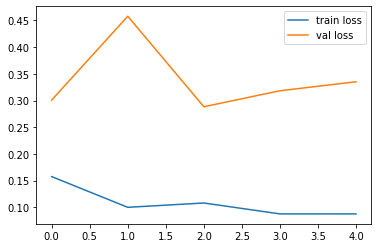

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

### Plot the accuracy

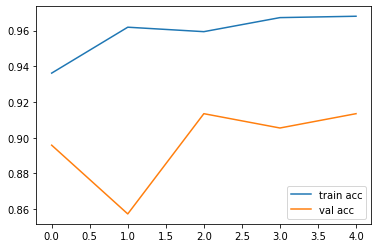

<Figure size 432x288 with 0 Axes>

In [34]:
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [120]:
result.history

{'loss': [0.15756386518478394,
  0.10005170106887817,
  0.10814765840768814,
  0.087722048163414,
  0.08769585192203522],
 'accuracy': [0.9361580014228821,
  0.9618481397628784,
  0.9593558311462402,
  0.9672162532806396,
  0.9679831266403198],
 'val_loss': [0.30085891485214233,
  0.4578290581703186,
  0.2883703410625458,
  0.31830164790153503,
  0.3351389467716217],
 'val_accuracy': [0.8958333134651184,
  0.8573718070983887,
  0.9134615659713745,
  0.9054487347602844,
  0.9134615659713745]}

### Saving the model which used VGG16

In [44]:
import tensorflow as tf
from keras.models import load_model

model.save('model_vgg16.h5')

## Using Xception to create the model

In [35]:
from keras.applications.xception import Xception

In [36]:
xcep = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top = False)

In [37]:
for layer in xcep.layers:
    layer.trainable = False

In [38]:
x2 = Flatten()(xcep.output)

In [39]:
prediction = Dense(len(folders), activation='softmax')(x2)

In [40]:
model2 = Model(inputs=xcep.input, outputs=prediction)

In [41]:
model2.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [42]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [43]:
result2 = model2.fit_generator(
    training_set,
    validation_data=testing_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)
# val_accuracy: 0.8782
# accuracy: 0.9479

Epoch 1/5
163/163 [==============================] - 731s 4s/step - loss: 0.6852 - accuracy: 0.9206 - val_loss: 1.1662 - val_accuracy: 0.8830
Epoch 2/5
163/163 [==============================] - 717s 4s/step - loss: 0.4977 - accuracy: 0.9457 - val_loss: 1.4987 - val_accuracy: 0.8702
Epoch 3/5
163/163 [==============================] - 751s 5s/step - loss: 0.4783 - accuracy: 0.9490 - val_loss: 1.9120 - val_accuracy: 0.8830
Epoch 4/5
163/163 [==============================] - 759s 5s/step - loss: 0.4768 - accuracy: 0.9536 - val_loss: 2.7513 - val_accuracy: 0.8670
Epoch 5/5
163/163 [==============================] - 749s 5s/step - loss: 0.7402 - accuracy: 0.9479 - val_loss: 1.5238 - val_accuracy: 0.8782


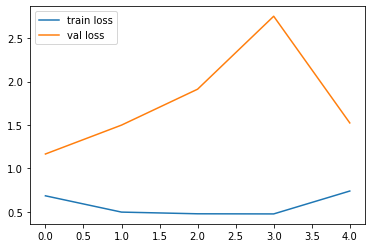

<Figure size 432x288 with 0 Axes>

In [45]:
# plot the loss
plt.plot(result2.history['loss'], label='train loss')
plt.plot(result2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

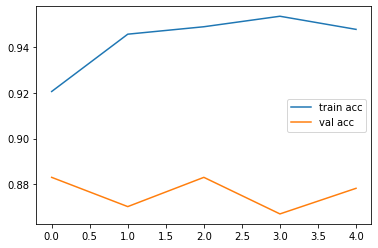

<Figure size 432x288 with 0 Axes>

In [46]:
# plot the accuaracy
plt.plot(result2.history['accuracy'], label='train acc')
plt.plot(result2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

## Using ResNet50 to create the model

In [50]:
from keras.applications.resnet50 import ResNet50

In [51]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top = False)

In [52]:
for layer in resnet.layers:
    layer.trainable = False

In [53]:
x3 = Flatten()(resnet.output)

In [54]:
prediction = Dense(len(folders), activation='softmax')(x3)

In [55]:
model3 = Model(inputs=resnet.input, outputs=prediction)

In [56]:
model3.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [57]:
model3.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [58]:
result3 = model3.fit_generator(
    training_set,
    validation_data=testing_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)
# val_accuracy: 0.8301
# accuracy: 0.8915

Epoch 1/5
163/163 [==============================] - 617s 4s/step - loss: 1.0694 - accuracy: 0.7584 - val_loss: 0.3865 - val_accuracy: 0.8429
Epoch 2/5
163/163 [==============================] - 581s 4s/step - loss: 0.3519 - accuracy: 0.8493 - val_loss: 0.8742 - val_accuracy: 0.6859
Epoch 3/5
163/163 [==============================] - 647s 4s/step - loss: 0.3020 - accuracy: 0.8748 - val_loss: 0.3410 - val_accuracy: 0.8510
Epoch 4/5
163/163 [==============================] - 663s 4s/step - loss: 0.3090 - accuracy: 0.8746 - val_loss: 0.7033 - val_accuracy: 0.7580
Epoch 5/5
163/163 [==============================] - 655s 4s/step - loss: 0.3005 - accuracy: 0.8915 - val_loss: 0.4143 - val_accuracy: 0.8301


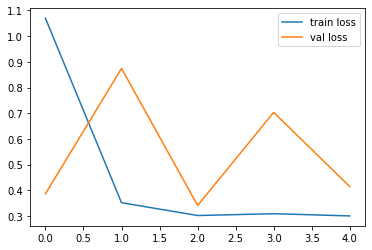

<Figure size 432x288 with 0 Axes>

In [59]:
# plot the loss
plt.plot(result3.history['loss'], label='train loss')
plt.plot(result3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

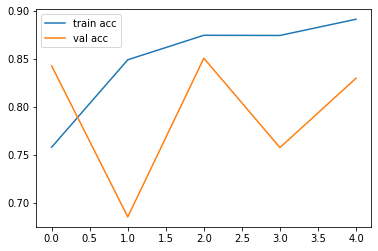

<Figure size 432x288 with 0 Axes>

In [60]:
# plot the accuaracy
plt.plot(result3.history['accuracy'], label='train acc')
plt.plot(result3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Out of the 3 models trained VGG16 gave the best result hence VGG16 model is saved

## Using the saved model for prediction

In [66]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

In [68]:
img = image.load_img('../../../../chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg', target_size=(224, 224))
x = image.img_to_array(img)  # convert to array
x = np.expand_dims(x, axis=0) # expanding the dimensions
img_data = preprocess_input(x) # preprocess the image

classes = model.predict(img_data)  # predict

In [76]:
import cv2

CATRGORIES = ["Pneumonia", "Normal"]

def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), 3)
    return new_array.reshape(1, 224, 224, 3)

load_modal = tf.keras.models.load_model('model_vgg16.h5')

In [117]:
predict = load_modal.predict([prepare('../../../../chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg')])
print(CATRGORIES[int(round(predict[0][0]))])

Pneumonia


In [116]:
predict = load_modal.predict([prepare('../../../../chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg')])
print(CATRGORIES[int(round(predict[0][0]))])

Pneumonia


In [115]:
predict = load_modal.predict([prepare('../../../../chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg')])
print(CATRGORIES[int(round(predict[0][0]))])

Pneumonia


In [114]:
predict = load_modal.predict([prepare('../../../../chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg')])
print(CATRGORIES[int(round(predict[0][0]))])

Pneumonia


In [113]:
predict = load_modal.predict([prepare('../../../../chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg')])
print(CATRGORIES[int(round(predict[0][0]))])

Pneumonia


In [112]:
predict = load_modal.predict([prepare('../../../../chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg')])
print(CATRGORIES[int(round(predict[0][0]))])

Pneumonia


In [111]:
predict = load_modal.predict([prepare('../../../../chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg')])
print(CATRGORIES[int(round(predict[0][0]))])

Pneumonia


In [109]:
predict = load_modal.predict([prepare('../../../../chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg')])
print(CATRGORIES[int(round(predict[0][0]))])

Normal


In [110]:
predict = load_modal.predict([prepare('../../../../chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg')])
print(CATRGORIES[int(round(predict[0][0]))])

Normal
